In [ ]:
!pip install uszipcode==1.0.1

In [7]:
!pip install uszipcode==1.0.1


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import uszipcode
from uszipcode import SearchEngine


/root/venv/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [15]:
df = pd.read_csv("zip_codes.csv")

# Set display options to show all rows and columns - This is for printing
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Create a SearchEngine instance - we'll use this to get the counties from the zip code
search = SearchEngine()


# Define a function to look up county information for a given ZIP code
def county_info_finder(zipcode):
    try:
        zipcode_info = search.by_zipcode(zipcode)
        return zipcode_info.county
    except Exception as e:
        # Handle the error (e.g., invalid ZIP code) here
        return "Invalid ZIP Code"


# Add a new column to the DataFrame with the county information
df['county_name'] = df['Zip Code'].apply(county_info_finder)

# Print the DataFrame to see the added County column
print(df['county_name'])

#print(df)

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!
0       Washtenaw County
1       Washtenaw County
2       Washtenaw County
3         Jackson County
4       Washtenaw County
5       Washtenaw County
6       Washtenaw County
7       Washtenaw County
8       Washtenaw County
9           Wayne County
10      Washtenaw County
11      Washtenaw County
12      Washtenaw County
13     Livingston County
14          Wayne County
15      Washtenaw County
16          Wayne County
17      Washtenaw County
18      Washtenaw County
19      Washtenaw County
20      Washtenaw County
21        Oakland County
22      Washtenaw 

In [16]:
#read in shapefile AKA county map
#notice that the column "Label" is the column we want to match on the "county_name" column in the df
counties = gpd.read_file('Counties_(v17a).shp')
print(counties['LABEL'])

0             Alcona County
1              Alger County
2            Allegan County
3             Alpena County
4             Antrim County
5             Arenac County
6             Baraga County
7              Barry County
8                Bay County
9             Benzie County
10           Berrien County
11            Branch County
12           Calhoun County
13              Cass County
14        Charlevoix County
15         Cheboygan County
16          Chippewa County
17             Clare County
18           Clinton County
19          Crawford County
20             Delta County
21         Dickinson County
22             Eaton County
23             Emmet County
24           Genesee County
25           Gladwin County
26           Gogebic County
27    Grand Traverse County
28           Gratiot County
29         Hillsdale County
30          Houghton County
31             Huron County
32            Ingham County
33             Ionia County
34             Iosco County
35              Iron

/tmp/ipykernel_37/1579858740.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties['coordinates'] = counties['geometry'].centroid


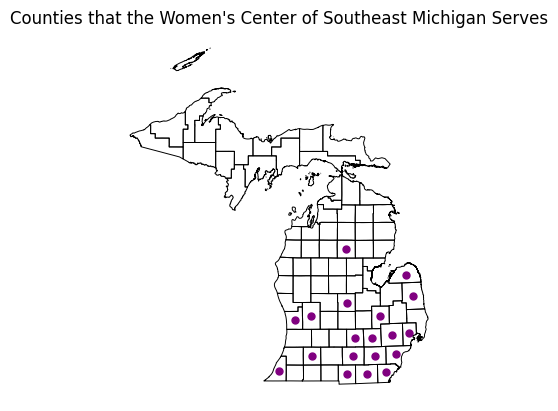

In [30]:
counties_unique=df['county_name'].unique()
counties['coordinates'] = counties['geometry'].centroid

fig, ax = plt.subplots()

# Plot all the counties in shapefile
counties.boundary.plot(ax=ax, color='Black', linewidth=0.7)

# Plot a dot for each county present in the csv data
for county in counties_unique:
    if county in counties['LABEL'].values:
        # Plotting centroids only for the counties present in the csv
        counties.loc[counties['LABEL'] == county, 'coordinates'].plot(ax=ax, marker='o', color='purple', markersize=25)

plt.title("Counties that the Women's Center of Southeast Michigan Serves")
plt.axis('off')
plt.show()



In [26]:
df.county_name.value_counts()



Washtenaw County     353
Wayne County          56
Oakland County        19
Livingston County     13
Jackson County        10
Macomb County          7
Lenawee County         6
Monroe County          5
Ingham County          4
Genesee County         4
Hillsdale County       2
Kalamazoo County       1
Invalid ZIP Code       1
Ottawa County          1
Gratiot County         1
Sanilac County         1
Kent County            1
Roscommon County       1
Mercer County          1
Berrien County         1
Huron County           1
Name: county_name, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d95935a3-2da0-4a08-a04d-6ba7c857a4f3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>